<!-- dom:TITLE: Основы NumPy: массивы и векторные вычисления -->
# Основы NumPy: массивы и векторные вычисления
<!-- dom:AUTHOR: С.В. Лемешевский Email:sergey.lemeshevsky@gmail.com at Институт математики НАН Беларуси -->
<!-- Author: -->  
**С.В. Лемешевский** (email: `sergey.lemeshevsky@gmail.com`), Институт математики НАН Беларуси

Date: **Mar 18, 2020**

<!-- Common Mako variable and functions -->
<!-- -*- coding: utf-8 -*- -->


Рассматривается библиотека NumPy. NumPy (сокращение от *Numerical
Python*) предоставляет эффективный интерфейс для хранения и работы с
данными. В какой-то степени массивы NumPy аналогичны спискам Python,
но массивы NumPy обеспечивают гораздо более эффективное хранение и
операции с данными при увеличении массивов в размере. Если NumPy
установлен его можно импортировать следующей командой:

In [ ]:
import numpy

Большинство людей в мире научного Python импортируют NumPy, используя
`np` в качестве псевдонима:

In [ ]:
import numpy as np

> **О встроенной документации.**
>
> Как было рассказано выше IPython дает возможность быстро просмотреть
> содержание пакета, а также документацию по функциям.
> 
> Например, для того чтобы отобразить содержание пространства имен
> `numpy`, можно выполнить следующее:
>

In [ ]:
np.

> 
> Для отображения встроенной документации NumPy можно набрать
> следующее:

In [ ]:
np?

> Более детальную документацию вместе с учебниками и другими ресурсами
> можно найти по адресу: <https://numpy.org/>






Одна из причин того, почему NumPy настолько важен для численных
расчетов в Python, заключается в том, что он разработан, как уже
упоминалось выше, для более эффективной работы с большими массивами
данных, а именно:

* NumPy хранит данные в непрерывных блоках памяти, независимо от других встроенных объектов Python. Библиотека алгоритмов NumPy, написанная на языке C, может работать на этой памяти без проверки типов или других накладных расходов. Массивы NumPy также используют намного меньше памяти, чем встроенные объекты Python.

* Операции NumPy выполняют сложные вычисления над всем массивом без использования цикла `for`.

Для того чтобы показать разницу в производительности, рассмотрим
массив NumPy из одного миллиона целых чисел и эквивалентный список:

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1000000)

In [3]:
my_list = list(range(1000000))

In [4]:
%time for _ in range(10): my_arr2 = my_arr*2

CPU times: user 32.3 ms, sys: 16.8 ms, total: 49.1 ms
Wall time: 126 ms


In [5]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 817 ms, sys: 172 ms, total: 989 ms
Wall time: 1.06 s


# Объект многомерных массивов `ndarray`
<div id="numpy:ndarray"></div>

Одной из ключевых особенностей NumPy является объект N-мерных
массивов, или `ndarray`, который является быстрым, гибким контейнером 
для больших наборов данных в Python. Массивы позволяют выполнять
математические операции над целыми блоками данных, используя схожий
синтаксис для эквивалентных операций со скалярными элементами.

Рассмотрим пример: создадим небольшой массив случайных данных:

In [6]:
import numpy as np

In [7]:
data = np.random.randn(2, 3)

In [8]:
data

array([[ 0.62955711,  0.22558868, -0.15732107],
       [-1.23977365, -0.04357442,  0.82177343]])

In [9]:
data * 10

array([[  6.29557109,   2.25588682,  -1.57321072],
       [-12.39773646,  -0.43574416,   8.21773429]])

In [10]:
data + data

array([[ 1.25911422,  0.45117736, -0.31464214],
       [-2.47954729, -0.08714883,  1.64354686]])

`ndarray` является общим контейнером для однородных многомерных
данных, то есть все элементы должны быть одного типа. Каждый массив имеет
атрибут `shape` — кортеж, указывающий размер каждого измерения, и
атрибут `dtype`, объект, описывающий тип данных массива:

In [11]:
data.shape

(2, 3)

In [12]:
data.dtype

dtype('float64')

## Создание массива
<div id="numpy:ndarray:create"></div>

Простейший способ создания массива — использование функции
`array`. Она принимает некоторый объект типа последовательностей
(включая другие массивы) и создает новый массив NumPy, содержащий
переданные данные. Например:

In [13]:
data1 = [6, 7.5, 8, 0, 1]

In [14]:
arr1 = np.array(data1)

In [15]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Вложенные последовательности, как список списков одинаковой длины,
будут преобразованы в многомерный массив:

In [22]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [28]:
arr2 = np.array(data2, dtype='float64')

In [29]:
arr2

array([[1., 2., 3., 4.],
       [5., 6., 7., 8.]])

Если явно не указано, `np.array` пытается вывести подходящий тип
данных для массива, который он создает. Тип данных хранится в
специальном объекте `dtype` метаданных; например, в двух предыдущих
примерах мы имеем:

In [30]:
In [19]: arr2.dtype

dtype('float64')

Кроме `np.array` есть несколько других функций для создания новых
массивов:

In [31]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [32]:
np.empty((2, 3, 2))

array([[[4.68232729e-310, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]]])

In [36]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [38]:
np.empty_like(arr2)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## Таблица 1 : Функции создания массивов


<table border="1">
<thead>
<tr><th align="left">       Функция        </th> <th align="left">                                                                                       Описание                                                                                       </th> </tr>
</thead>
<tbody>
<tr><td align="left">   <code>array</code>                   </td> <td align="left">   Преобразует входные данные (список, кортеж, массив или другая последовательность) в <code>ndarray</code>, либо прогнозируя <code>dtype</code>, либо используя заданный <code>dtype</code>; копирует данные по-умолчанию    </td> </tr>
<tr><td align="left">   <code>asarray</code>                 </td> <td align="left">   Преобразует входные данные в <code>ndarray</code>, но не копирует их, если аргумент уже типа <code>ndarray</code>                                                                                               </td> </tr>
<tr><td align="left">   <code>arange</code>                  </td> <td align="left">   Подобна встроенной функции <code>range</code>, но возвращает <code>ndarray</code> вместо списка                                                                                                                 </td> </tr>
<tr><td align="left">   <code>ones</code>                    </td> <td align="left">   Создает массив из единиц заданной формы и <code>dtype</code>                                                                                                                                         </td> </tr>
<tr><td align="left">   <code>ones_like</code>               </td> <td align="left">   Получает на вход массив и создает массив из единиц с такими же  формой и <code>dtype</code>                                                                                                          </td> </tr>
<tr><td align="left">   <code>zeros</code> и <code>zeros_like</code>    </td> <td align="left">   Подобны <code>ones</code> и <code>ones_like</code>, но создают массивы из нулей                                                                                                                                 </td> </tr>
<tr><td align="left">   <code>empty</code> и <code>empty_like</code>    </td> <td align="left">   Создают новые массивы, выделяя новую память, но не инициализируют их какими-либо значениями, как <code>ones</code> и <code>zeros</code>                                                                         </td> </tr>
<tr><td align="left">   <code>full</code>                    </td> <td align="left">   Создает массив заданных формы и <code>dtype</code>, при этом все элементы инициализируются заданным значением <code>fill_value</code>                                                                           </td> </tr>
<tr><td align="left">   <code>full_like</code>               </td> <td align="left">   Получает на вход массив и создает массив с такими же формой и <code>dtype</code> и значениями <code>fill_value</code>                                                                                           </td> </tr>
<tr><td align="left">   <code>eye</code> и <code>identity</code>        </td> <td align="left">   Создает квадратную единичную матрицу (с единицами на диагонали и нулями вне нее) размера $N\times N$                                                                                      </td> </tr>
</tbody>
</table>

## Арифметические операции с массивами NumPy
<div id="numpy:ndarray:arithm"></div>

Массивы NumPy, как упоминалось выше, позволяют выполнять операции без
использования циклов. Любые арифметические операции между массивами
одинакового размера выполняются поэлементно:

In [39]:
import numpy as np

In [40]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [41]:
In [3]: arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [42]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [43]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

Арифметические операции со скалярами распространяют скалярный аргумент
к каждому элементу массива:

In [44]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [45]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [46]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [47]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [48]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## Основы индексирования и срезы
<div id="numpy:ndarray:index"></div>

Существует много способов выбора подмножества данных или элементов
массива. Одномерные массивы — это просто, на первый взгляд они
аналогичны спискам Python:

In [49]:
arr = np.arange(10)

In [50]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
arr[5]

5

In [52]:
arr[5:8]

array([5, 6, 7])

In [53]:
arr[5:8] = 12

In [54]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

Как видно, если присвоить скалярное значение срезу, как например,
`arr[5:8] = 12`, значение присваивается всем элементам среза. Первым
важным отличием от списков Python заключается в том, что срезы массива
являются *представлениями* исходного массива. Это означает, что данные
не копируются и любые изменения в представлении будут отражены в
исходном массиве.

Рассмотрим пример. Сначала создадим срез массива `arr`:

In [55]:
arr_slice = arr[5:8]

In [56]:
arr_slice

array([12, 12, 12])

Теперь, если мы изменим значения в массиве `arr_slice`, то они
отразятся в исходном массиве `arr`:

In [57]:
arr_slice[1] = 12345

In [58]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

«Голый» срез `[:]` присвоит все значения в массиве:

In [59]:
arr_slice[:] = 64

In [61]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

Поскольку NumPy был разработан для работы с очень большими массивами,
вы можете представить себе проблемы с производительностью и памятью,
если NumPy будет настаивать на постоянном копировании данных. 

> **Замечание.**
>
> Если вы захотите скопировать срез в массив вместо отображения, нужно
> явно скопировать массив, например, `arr[5:8].copy()`.





С массивами более высокой размерности существует больше вариантов. В
двумерных массивах каждый элемент это уже не скаляр, а одномерный
массив.

In [62]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [63]:
arr2d[2]

array([7, 8, 9])

Таким образом, к отдельному элементу можно получить доступ
рекурсивно, либо передать разделенный запятыми список
индексов. Например, следующие два примера эквивалентны:

In [64]:
arr2d[2]

array([7, 8, 9])

In [66]:
arr2d[0, 2]

3

Если в многомерном массиве опустить последние индексы, то возвращаемый
объект будет массивом меньшей размерности. Например, создадим массив
размерности $2 \times 2 \times 3$:

In [67]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [68]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

При этом `arr3d[0]` — массив размерности $2 \times 3$:

In [69]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Можно присваивать `arr3d[0]` как скаляр, так и массивы:

In [70]:
old_values = arr3d[0].copy()

In [71]:
arr3d[0] = 42

In [72]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [73]:
arr3d[0] = old_values

In [74]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Аналогично, `arr3d[1, 0]` возвращает все значения, чьи индексы
начинаются с `(1, 0)`, формируя одномерный массив:

In [75]:
arr3d[1, 0]

array([7, 8, 9])

Это выражение такое же, как если бы мы проиндексировали в два этапа:

In [76]:
x = arr3d[1]

In [77]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [78]:
x[0]

array([7, 8, 9])

### Индексирование с помощью срезов

<div id="numpy:ndarray:index:slices"></div>

Как одномерные объекты, такие как списки, можно получать срезы
массивов посредством знакомого синтаксиса:

In [79]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [80]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

Рассмотрим введенный выше двумерный массив `arr2d`. Получение срезов
этого массива немного отличается от одномерного:

In [81]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [83]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

Как видно, мы получили срез вдоль оси 0, первой оси. Срез, таким
образом, выбирает диапазон элементов вдоль оси. Выражение `arr2d[:2]`
можно прочитать как «выбираем первые две строки массива `arr2d`».

Можно передавать несколько срезов:

In [84]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

При получении срезов мы получаем только отображения массивов того же
числа размерностей. Используя целые индексы и срезы, можно получить
срезы меньшей размерности:

In [85]:
arr2d[1, :2]

array([4, 5])

In [86]:
arr2d[:2, 2]

array([3, 6])

Смотрите рис. [Срезы двумерного массива](#numpy:ndarray:fig:1).

<!-- dom:FIGURE: [fig-numpy/numpy-1.png, width=800 frac=1.0] Срезы двумерного массива <div id="numpy:ndarray:fig:1"></div> -->
<!-- begin figure -->
<div id="numpy:ndarray:fig:1"></div>

![Срезы двумерного массива](fig-numpy/numpy-1.png)<!-- end figure -->

## Логическое (Boolean) индексирование
<div id="numpy:ndarray:index:boolean"></div>

Рассмотрим следующий пример: пусть есть массив с данными (случайными)
и массив, содержащий имена с повторениями:

In [87]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [88]:
data = np.random.randn(7, 4)

In [89]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [90]:
data

array([[-0.82140362, -0.86893292,  0.35878084,  1.19421416],
       [ 0.18917265,  0.88951114,  2.08247663, -1.46309521],
       [ 0.38527055, -0.64156109, -0.68752561, -0.44596498],
       [ 0.25858596,  0.06023044,  1.50015656, -1.02248333],
       [ 0.14946992,  0.33947354,  0.22352679,  0.31321873],
       [-0.50100629, -1.46226109, -0.77062983,  0.18851851],
       [ 0.93945891, -0.23340384, -0.51620892, -0.60490697]])

Предположим, что каждое имя соответствует строке в массиве `data`, и
мы хотим выбрать все строки с соответствующим именем `'Bob'`. Как и
арифметические операции, операции сравнения (такие как `==`) с
массивами также векторизованы. Таким образом, сравнение массива
`names` со строкой `'Bob'` возвращает булев массив:

In [91]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

Этот булев массив может использоваться при индексировании массива:

In [92]:
data[names == 'Bob']

array([[-0.82140362, -0.86893292,  0.35878084,  1.19421416],
       [ 0.25858596,  0.06023044,  1.50015656, -1.02248333]])

Булев массив должен быть той же длины, что и ось массива, по которой
осуществляется индексация. Вы даже можете смешивать и сопоставлять
логические массивы со срезами или целыми числами (или
последовательностями целых чисел).

In [93]:
data[names == 'Bob', 2:]

array([[ 0.35878084,  1.19421416],
       [ 1.50015656, -1.02248333]])

In [94]:
data[names == 'Bob', 3]

array([ 1.19421416, -1.02248333])

Чтобы выбрать все, кроме `'Bob'`, можно использовать `!=` или
обращение условия ` `:

In [95]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [96]:
data[~(names == 'Bob')]

array([[ 0.18917265,  0.88951114,  2.08247663, -1.46309521],
       [ 0.38527055, -0.64156109, -0.68752561, -0.44596498],
       [ 0.14946992,  0.33947354,  0.22352679,  0.31321873],
       [-0.50100629, -1.46226109, -0.77062983,  0.18851851],
       [ 0.93945891, -0.23340384, -0.51620892, -0.60490697]])

Оператор ` ` может быть полезен при инвертировании общего условия:

In [97]:
cond = names == 'Bob'

Выбрав два из трех имен для объединения нескольких логических условий,
можно использовать логические арифметические операторы, такие как `&` (и) и `|`
(или):

In [98]:
mask = (names == 'Bob') | (names == 'Will')

In [99]:
mask

array([ True, False,  True,  True,  True, False, False])

In [100]:
data[mask]

array([[-0.82140362, -0.86893292,  0.35878084,  1.19421416],
       [ 0.38527055, -0.64156109, -0.68752561, -0.44596498],
       [ 0.25858596,  0.06023044,  1.50015656, -1.02248333],
       [ 0.14946992,  0.33947354,  0.22352679,  0.31321873]])

Выбор данных из массива с помощью логического индексирования *всегда*
создает копию данных, даже если возвращаемый массив не изменяется. 

> **Предупреждение.**
>
> Ключевые слова Python  `and` и `or` не работают с булевыми массивами.
> Используйте `&` (и) и `|` (или).





Присвоение значений массивам работает обычным образом. Замену
всех отрицательных значений на `0` можно сделать следующим образом:

In [101]:
data[data < 0] = 0

In [102]:
data

array([[0.        , 0.        , 0.35878084, 1.19421416],
       [0.18917265, 0.88951114, 2.08247663, 0.        ],
       [0.38527055, 0.        , 0.        , 0.        ],
       [0.25858596, 0.06023044, 1.50015656, 0.        ],
       [0.14946992, 0.33947354, 0.22352679, 0.31321873],
       [0.        , 0.        , 0.        , 0.18851851],
       [0.93945891, 0.        , 0.        , 0.        ]])

Можно также легко присваивать значения целым строкам или столбцам:

In [104]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.18917265, 0.88951114, 2.08247663, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.18851851],
       [0.93945891, 0.        , 0.        , 0.        ]])

## Необычное индексирование
<div id="numpy:ndarray:fancy"></div>

*Необычное индексирование* (*fancy indexing*) — это термин, принятый в
NumPy для описания индексации с использованием целочисленных
массивов.

Предположим, у нас есть массив размера $8 \times 4$

In [105]:
arr = np.empty((8, 4))

In [106]:
for i in range(8):
    arr[i] = i

In [107]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

Чтобы выбрать подмножество строк в определенном порядке, можно
просто передать список или массив целых чисел, указывающих желаемый
порядок:

In [108]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Использование отрицательных индексов выделяет строки с конца:

In [109]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Передача нескольких индексных массивов делает кое-что другое:
выбирается одномерный массив элементов, соответствующий каждому
кортежу индексов:

In [110]:
arr = np.arange(32).reshape((8, 4))

In [111]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [112]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

Здесь выбраны элементы с индексами `(1, 0)`, `(5, 3)`, `(7, 1)` и
`(2, 2)`. Независимо от того какая размерность у массива (в нашем
случае двумерный массив), результат такого индексирования — всегда
одномерный массив.

Поведение индексирования в этом случае немного отличается
от того, что могли ожидать некоторые пользователи, а именно:
пользователь мог ожидать прямоугольную область, сформированную путем
выбора поднабора строк и столбцов матрицы. Ниже представлен один из
способов получения таких массивов с помощью необычного индексирования:

In [113]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Имейте в виду, что необычное индексирование, в отличие от среза,
всегда копирует данные в новый массив. 

## Транспонирование массивов и замена осей
<div id="numpy:ndarray:transp"></div>

*Транспонирование* — это особый способ изменения формы массива, который
возвращает представление исходных данных без их копирования. Массивы
имеют метод `transpose`, а также специальный атрибут `T`:

In [114]:
arr = np.arange(15).reshape((3, 5))

In [115]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [116]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

При выполнении матричных вычислений эта процедура может выполняться
очень часто, например, при вычислении произведения матриц с помощью
функции `np.dot`:

In [117]:
arr = np.random.randn(6, 3)

In [121]:
np.dot(arr, arr.T)

array([[ 3.46322896, -4.14442467,  1.04472649,  0.15738471,  1.04379431,
        -0.08858869],
       [-4.14442467,  9.240576  , -1.26566321,  1.01457059, -5.07786287,
        -3.58866767],
       [ 1.04472649, -1.26566321,  0.3532345 ,  0.12642368,  0.40950912,
        -0.05557913],
       [ 0.15738471,  1.01457059,  0.12642368,  0.52758825, -0.85138148,
        -1.13459846],
       [ 1.04379431, -5.07786287,  0.40950912, -0.85138148,  3.91070291,
         3.18803697],
       [-0.08858869, -3.58866767, -0.05557913, -1.13459846,  3.18803697,
         3.23775554]])

Для массивов большей размерности метод `transpose` принимает кортеж с
номерами осей, задающий перестановку осей:

In [122]:
arr = np.arange(16).reshape((2, 2, 4))

In [123]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [124]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Здесь оси были переупорядочены следующим образом: вторая ось стала
первой, первая ось — второй, а последняя осталась без изменений.

Простое транспонирование с помощью `.T` является частным случаем
замены осей. Массивы имеют метод `swapaxes`, который получает пару
номеров осей и переставляет указанные оси.

In [125]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

Метод `swapaxes` возвращает представление данных без копирования.

<!-- Local Variables: -->
<!-- doconce-chapter-nickname: "numpy" -->
<!-- doconce-section-nickname: "ndarray" -->
<!-- End: -->

# Универсальные функции: быстрые поэлементные функции от массивов
<div id="numpy:ufuncs"></div>


*Универсальные функции* (или *ufunc*) — это функции, которые выполняют
поэлементные операции над данными массива. Можно рассматривать их как
быстрые векторизованные обертки для простых функций, которые
принимают одно или несколько скалярных значений и дают один или
несколько скалярных результатов.

Многие универсальные функции — это простые поэлементные
преобразования, такие как `sqrt` и `exp`:

In [126]:
arr = np.arange(10)

In [127]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [128]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [129]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

Они являются *унарными* универсальными функциями. Такие функции как
`add` или `maximum` принимают два массива (таким образом,
они *бинарные*) и возвращают один массив:

In [130]:
x = np.random.randn(8)

In [131]:
y = np.random.randn(8)

In [132]:
x

array([ 2.08704952,  0.667266  , -0.71887926, -0.15743078,  0.22513646,
       -0.46213473,  0.24903736,  0.37368926])

In [133]:
y

array([ 1.52863443,  1.23222058,  0.02590632,  0.00407584, -0.48825997,
       -1.35003619,  1.18385403, -0.39441701])

In [134]:
np.maximum(x, y)

array([ 2.08704952,  1.23222058,  0.02590632,  0.00407584,  0.22513646,
       -0.46213473,  1.18385403,  0.37368926])

Функция `np.maximum` вычисляет максимумы элементов массивов `x` и `y`.

Универсальная функция может возвращать несколько массивов (хотя и не
часто). Например, функция `np.modf` (векторизованная версия встроенной
функции `divmod`) возвращает целую и дробную части массива чисел с
плавающей запятой:

In [135]:
arr = np.random.randn(7) * 5

In [136]:
arr

array([ 0.2651191 ,  3.61935128,  2.95554924, -1.20869286, -6.12229553,
       -5.16836684, -9.73540368])

In [137]:
frac_part, int_part = np.modf(arr)

In [138]:
frac_part

array([ 0.2651191 ,  0.61935128,  0.95554924, -0.20869286, -0.12229553,
       -0.16836684, -0.73540368])

In [139]:
int_part

array([ 0.,  3.,  2., -1., -6., -5., -9.])

Универсальные функции принимают опциональный аргумент `out`, который
позволяет выполнять операции прямо в заданном массиве.

In [148]:
arr = np.random.randn(7) * 5
arr = arr*arr
arr

array([14.63975259,  4.14397492,  0.51495895, 19.90946953,  3.47673844,
       38.1643936 ,  2.36089628])

In [150]:
np.sqrt(arr)

array([3.82619296, 2.03567554, 0.71760641, 4.46200286, 1.86460142,
       6.17773369, 1.53652084])

In [151]:
arr

array([14.63975259,  4.14397492,  0.51495895, 19.90946953,  3.47673844,
       38.1643936 ,  2.36089628])

In [152]:
np.sqrt(arr, arr)

array([3.82619296, 2.03567554, 0.71760641, 4.46200286, 1.86460142,
       6.17773369, 1.53652084])

In [153]:
arr

array([3.82619296, 2.03567554, 0.71760641, 4.46200286, 1.86460142,
       6.17773369, 1.53652084])

В таблицах [2](#numpy:ufuncs:tbl:1) и [3](#numpy:ufuncs:tbl:2)
представлены доступные универсальные функции.

## Таблица 2 : Унарные универсальные функции <div id="numpy:ufuncs:tbl:1"></div>




<table border="1">
<thead>
<tr><th align="center">                           Функция                           </th> <th align="center">                                                         Описание                                                         </th> </tr>
</thead>
<tbody>
<tr><td align="left">   <code>abs</code>, <code>fabs</code>                                                    </td> <td align="left">   Вычисляет абсолютные значения каждого элементов массива                                                                       </td> </tr>
<tr><td align="left">   <code>sqrt</code>                                                           </td> <td align="left">   Вычисляет квадратный корень из каждого элемента массива (эквивалентно <code>arr ** 0.5</code>)                                           </td> </tr>
<tr><td align="left">   <code>square</code>                                                         </td> <td align="left">   Вычисляет квадрат каждого элемента массива (эквивалентно <code>arr ** 2</code>)                                                          </td> </tr>
<tr><td align="left">   <code>exp</code>                                                            </td> <td align="left">   Вычисляет экспоненту ($e^x$) от каждого элемента массива                                                                      </td> </tr>
<tr><td align="left">   <code>log</code>, <code>log10</code>, <code>log2</code>, <code>log1p</code>                                  </td> <td align="left">   Вычисляет натуральный, десятичный логарифмы, логарифм по основанию $2$ и $\log(1 + x)$, соответственно                        </td> </tr>
<tr><td align="left">   <code>sign</code>                                                           </td> <td align="left">   Вычисляет знак каждого элемента: $1$ (положительный элемент), $0$ (ноль), $-1$ (отрицательный элемент)                        </td> </tr>
<tr><td align="left">   <code>ceil</code>                                                           </td> <td align="left">   Вычисляет наименьшее целое число большее либо равное каждого элемента массива                                                 </td> </tr>
<tr><td align="left">   <code>floor</code>                                                          </td> <td align="left">   Вычисляет наибольшее целое число меньшее либо равное каждого элемента массива                                                 </td> </tr>
<tr><td align="left">   <code>rint</code>                                                           </td> <td align="left">   Округляет элементы к ближайшим целым сохраняя <code>dtype</code>                                                                         </td> </tr>
<tr><td align="left">   <code>modf</code>                                                           </td> <td align="left">   Возвращает дробные и целые части каждого элемента массива                                                                     </td> </tr>
<tr><td align="left">   <code>isnan</code>                                                          </td> <td align="left">   Возвращает булев массив, указывающий является каждый элемент входного массива <code>NaN</code> (Not A Number)                            </td> </tr>
<tr><td align="left">   <code>isfinite</code>, <code>isinf</code>                                              </td> <td align="left">   Возвращает булев массив, указывающий является каждый элемент конечным (не <code>inf</code> и не <code>NaN</code>) или бесконечным, соотвественно    </td> </tr>
<tr><td align="left">   <code>cos</code>, <code>cosh</code>, <code>sin</code>, <code>sinh</code>, <code>tan</code>, <code>tanh</code>                      </td> <td align="left">   Обычные и тригонометрические функции                                                                                          </td> </tr>
<tr><td align="left">   <code>arccos</code>, <code>arccosh</code>, <code>arcsin</code>, <code>arcsinh</code>, <code>arctan</code>, <code>arctanh</code>    </td> <td align="left">   Обратные тригонометрические функции                                                                                           </td> </tr>
<tr><td align="left">   <code>logical_not</code>                                                    </td> <td align="left">   Вычисляет истиное значение <code>not x</code> для каждого элемента (эквивалентно <code> arr</code>)                                                 </td> </tr>
</tbody>
</table>

## Таблица 3 : Бинарные универсальные функции <div id="numpy:ufuncs:tbl:2"></div>


<table border="1">
<thead>
<tr><th align="left">                               Функция                                </th> <th align="left">                                                Описание                                                </th> </tr>
</thead>
<tbody>
<tr><td align="left">   <code>add</code>                                                                     </td> <td align="left">   Складывает соответствующие элементы массивов                                                                </td> </tr>
<tr><td align="left">   <code>subtract</code>                                                                </td> <td align="left">   Вычитает соответствующие элементы второго массива из элементов первого                                      </td> </tr>
<tr><td align="left">   <code>multiply</code>                                                                </td> <td align="left">   Перемножает элементы массивов                                                                               </td> </tr>
<tr><td align="left">   <code>divide</code>, <code>floor_devide</code>                                                  </td> <td align="left">   Деление или деление с отбрасыванием остатка                                                                 </td> </tr>
<tr><td align="left">   <code>power</code>                                                                   </td> <td align="left">   Возведение элементов первого массива в степени указанные во втором массиве                                  </td> </tr>
<tr><td align="left">   <code>maximum</code>, <code>fmax</code>                                                         </td> <td align="left">   Поэлементный максимум, <code>fmax</code> игнорирует <code>NaN</code>                                                              </td> </tr>
<tr><td align="left">   <code>minimum</code>, <code>fmin</code>                                                         </td> <td align="left">   Поэлементный минимум, <code>fmin</code> игнорирует <code>NaN</code>                                                               </td> </tr>
<tr><td align="left">   <code>mod</code>                                                                     </td> <td align="left">   Поэлементный модуль (остаток от деления)                                                                    </td> </tr>
<tr><td align="left">   <code>copysign</code>                                                                </td> <td align="left">   Копирует знаки элементов второго массива в элементы первого массива                                         </td> </tr>
<tr><td align="left">   <code>greater</code>, <code>greater_equal</code>, <code>less</code>, <code>less_equal</code>, <code>equal</code>, <code>not_equal</code>    </td> <td align="left">   Поэлементное сравнение (эквивалентны операторам <code>></code>, <code>>=</code>, <code><</code>, <code><=</code> <code>==</code>, <code>!=</code>)                            </td> </tr>
<tr><td align="left">   <code>logical_and</code>, <code>logical_or</code>, <code>logical_xor</code>                                </td> <td align="left">   Вычисляет поэлементное значение истинности логической операций (эквивалентны операторам <code>&</code>, <code> | </code>, <code>^</code>)    </td> </tr>
</tbody>
</table>



<!-- Local Variables: -->
<!-- doconce-chapter-nickname: "numpy" -->
<!-- doconce-section-nickname: "ufuncs" -->
<!-- End: -->

# Программирование с использованием массивов
<div id="numpy:prog-with-array"></div>

Использование массивов NumPy позволяет выражать многие виды задач
обработки данных в виде кратких выражений с массивами, которые в
противном случае потребовали использования циклов. Такая практика
замены явных циклов на выражения с массивами обычно
называется *векторизацией*. Вообще говоря, векторизованные операции 
с массивами часто на один-два (или более) порядка быстрее, чем их
эквиваленты Python, что оказывает большое влияние на любые виды
вычислений.

В качестве простого примера, предположим, что мы хотим вычислить
функцию `sqrt(x^2 + y^2)` по всей регулярной сетке значений. Функция
`np.meshgrid` получает два одномерных массива и возвращает две
двумерные матрицы соответствующие всем парам `(x, y)` в двух массивах:

In [154]:
points = np.arange(-5, 5, 0.01)

In [155]:
xs, ys = np.meshgrid(points, points)

In [156]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [157]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Теперь для вычисления значений на всей сетке нужно написать то же
выражение, которое было бы написано для двух координат:

In [158]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [159]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Теперь воспользуемся библиотекой `matplotlib` (ее мы рассмотрим позже)
для визуализации двумерного массива:

In [161]:
%matplotlib inline

import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Визуализация функции $\\sqrt{x^2 + y^2}$ на сетке')

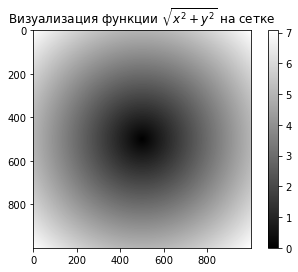

In [163]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title('Визуализация функции $\sqrt{x^2 + y^2}$ на сетке')

In [ ]:
plt.title('Визуализация функции $\sqrt{x^2 + y^2}$ на сетке')

Результат представлен на рисунке
[Визуализация функции, вычисленной на сетке](#numpy:prog-with-array:fig:2). Здесь использовалась функция
`imshow` библиотеки `matplotlib` для создания изображения по
двумерному массиву значений сеточной функции.

<!-- dom:FIGURE: [fig-numpy/numpy-2.png, width=800 frac=1.0] Визуализация функции, вычисленной на сетке <div id="numpy:prog-with-array:fig:2"></div> -->
<!-- begin figure -->
<div id="numpy:prog-with-array:fig:2"></div>

![Визуализация функции, вычисленной на сетке](fig-numpy/numpy-2.png)<!-- end figure -->


## Выражение условной логики в операциях с массивами
<div id="numpy:prog-with-array:cond"></div>

Функция `np.where` — векторизованная версия тернарного выражения
`x if condition else y`. Предположим, у нас есть булев массив и два
массива значений:

In [164]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [165]:
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [166]:
cond = np.array([True, False, True, True, False])

Предположим, мы хотим выбрать из массива `xarr` значения в том случае,
когда значение элемента массива `cond` равно `True`, иначе выбираем
значение из массива `yarr`. С использованием списка это может выглядеть
следующим образом:

In [167]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [168]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

Такой подход имеет несколько проблем. Во-первых, это не будет быстро
работать для очень больших массивов (потому что вся работа будет
выполняться интерпретируемым Python-кодом). Во-вторых, это не будет
работать с многомерными массивами. С помощью `np.where` все это можно
записать коротко:

In [169]:
result = np.where(cond, xarr, yarr)

In [171]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

Второй и третий аргументы функции `np.where` не обязательно должны
быть массивами, они могут быть скалярами. Типичное использование
функции `np.where` в анализе данных — это создание нового массива
значений на основе другого массива. Предположим есть матрица случайно
сгенерированных значений и нужно заменить все положительные значения
на число $2$, а отрицательные значения — на $-2$. Это легко сделать с
помощью функции `np.where`:

In [172]:
arr = np.random.randn(4, 4)

In [173]:
arr

array([[-0.66464048, -1.11134705,  1.37884191,  1.43021577],
       [-1.40300745, -0.75443307,  0.30600186, -0.0735264 ],
       [-0.70828539,  1.0644955 , -1.20046209, -0.70420307],
       [ 1.12269842, -0.43256645, -0.13543629, -0.02699621]])

In [174]:
arr > 0

array([[False, False,  True,  True],
       [False, False,  True, False],
       [False,  True, False, False],
       [ True, False, False, False]])

In [175]:
np.where(arr > 0, 2, -2)

array([[-2, -2,  2,  2],
       [-2, -2,  2, -2],
       [-2,  2, -2, -2],
       [ 2, -2, -2, -2]])

Можно объединять скаляры и массивы при использовании
`np.where`. Например, заменим все положительные элементы массива на
$2$:

In [176]:
np.where(arr > 0, 2, arr)

array([[-0.66464048, -1.11134705,  2.        ,  2.        ],
       [-1.40300745, -0.75443307,  2.        , -0.0735264 ],
       [-0.70828539,  2.        , -1.20046209, -0.70420307],
       [ 2.        , -0.43256645, -0.13543629, -0.02699621]])

## Математические и статистические методы
<div id="numpy:prog-with-array:math-stat"></div>

Некоторые математические функции, которые вычисляют статистику по
данным всего массива или по данным по какой-либо оси, доступны как
методы класса. Вы можете использовать *агрегаты* (часто называемые
*редукциями*), такие как `sum`, `mean` и `std` (стандартное отклонение),
либо вызывая метод экземпляра массива, либо используя функцию NumPy
верхнего уровня.

Ниже сгененированы случайные нормально распределенные данные и
вычислены некоторые статистические свойства:

In [177]:
arr = np.random.randn(5, 4)

In [178]:
arr

array([[-1.2167025 ,  0.26684004,  0.37933051,  0.92982079],
       [-0.02473966,  0.73980057, -0.44155996, -2.06986949],
       [ 0.03720622,  0.92436984, -1.58246901, -0.28881663],
       [-0.06352456,  0.55178233, -1.43402474,  2.07847906],
       [-0.55224505, -0.40871248,  0.78480968, -1.41514863]])

In [179]:
arr.mean()

-0.14026868401976725

In [180]:
np.mean(arr)

-0.14026868401976725

In [181]:
arr.sum()

-2.805373680395345

Функции типа `mean` и `sum` принимают опциональный аргумент `axis`,
указывающий по какой оси вычислять статистику. В результате получается
массив на одну размерность меньше.

In [185]:
arr.mean(axis=1)

array([ 0.08982221, -0.44909214, -0.2274274 ,  0.28317802, -0.39782412])

In [186]:
arr.sum(axis=0)

array([-1.82000556,  2.07408029, -2.29391351, -0.7655349 ])

Здесь `arr.mean(axis=1)` означает «вычислить средние значения по
столбцам», а `arr.sum(axis=0)` означает «вычислить сумму по строкам».

Другие методы, такие как `cumsum` и `cumprod`, не агрегируют, а
создают массив промежуточных результатов:

In [190]:
arr = np.array([1, 2, 3, 4, 5, 6, 7])

In [191]:
arr.cumprod()

array([   1,    2,    6,   24,  120,  720, 5040])

В многомерных массивах В многомерных массивах функции накопления,
такие как cumsum, возвращают массив того же размера, но с частичными
агрегатами, вычисленными вдоль указанной оси в соответствии с каждым
срезом меньшего размера:

In [193]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [194]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [195]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [196]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

В таблице [4](#numpy:prog-with-array:tbl:1) представлен полный список таких функций.

## Таблица 4 : Основные статистические методы для массивов <div id="numpy:prog-with-array:tbl:1"></div>


<table border="1">
<thead>
<tr><th align="left">     Функция      </th> <th align="left">                                                            Описание                                                           </th> </tr>
</thead>
<tbody>
<tr><td align="left">   <code>sum</code>                 </td> <td align="left">   Сумма всех элементов массива или вдоль оси. Массив нулевой длины имеет сумму, равную 0                                             </td> </tr>
<tr><td align="left">   <code>mean</code>                </td> <td align="left">   Арифметическое среднее. Массив нулевой длины имеет среднее значение <code>NaN</code>                                                          </td> </tr>
<tr><td align="left">   <code>std</code>, <code>var</code>          </td> <td align="left">   Стандартное отклонение и дисперсия, соответственно, с возможностью задания степени свободы (по умолчанию знаменатель равен <code>n</code>)    </td> </tr>
<tr><td align="left">   <code>min</code>, <code>max</code>          </td> <td align="left">   Минимум и максимум                                                                                                                 </td> </tr>
<tr><td align="left">   <code>argmin</code>, <code>argmax</code>    </td> <td align="left">   Индексы минимального и максимального элементов, соответственно                                                                     </td> </tr>
<tr><td align="left">   <code>cumsum</code>              </td> <td align="left">   Накопленная сумма элементов, начиная с $0$                                                                                         </td> </tr>
<tr><td align="left">   <code>cumprod</code>             </td> <td align="left">   Накопленное произведение элементов, начиная с $1$                                                                                  </td> </tr>
</tbody>
</table>

## Методы для булевых массивов
<div id="numpy:prog-with-array:bool"></div>

В рассмотренных выше методах булевы значения приводятся к $1$ (`True`)
и $0$ (`False`). Таким образом, `sum` часто используется как средство
подсчета значений `True` в логическом массиве:

In [199]:
arr = np.random.randn(100)
arr

array([-1.32390275, -1.0677737 , -0.75591368, -0.4284737 ,  1.60423034,
        0.69672924,  1.68048259,  0.43237566, -0.9369892 , -1.11156679,
        0.58929476,  0.08824475,  0.4212576 ,  0.39878124,  0.7383381 ,
       -0.35939768,  0.16423203, -0.92236598,  0.46042767, -0.98861342,
       -0.18848097, -0.79606263,  0.83448883, -1.8489933 ,  0.11509521,
       -0.52785657,  0.16546174,  1.62477592,  1.04921672, -0.08406352,
        1.33675875, -0.36904779, -0.25620027,  1.06950333, -0.05524866,
        2.31922315, -0.17508064,  0.51216759, -0.31534566, -1.61432312,
       -0.61582557, -0.38697939, -0.28057501, -1.32700842,  0.08026122,
        0.38809548,  0.30056911,  0.90816488, -0.14090822, -0.46949723,
       -0.26949007,  0.23234959, -1.01386424,  0.37079297, -0.92979541,
       -0.36825517, -1.51214788, -0.56054003, -0.84206451,  0.39224787,
       -0.77837871, -1.79345594,  1.1404122 , -2.05518387,  1.32978656,
        1.55939981, -1.12400554,  0.31047509, -0.30145171,  0.39

In [198]:
(arr > 0).sum()

47

Есть два дополнительных метода: `any` и `all`, которые очень полезны
при работе с булевыми массивами. Метод `any` проверяет, есть ли хотя
бы одно значение в массиве равное `True`, a `all` проверяет, все ли
значения в массиве равны `True`:

In [200]:
arr = np.array([False, False, True, False])

In [201]:
arr.any()

True

In [202]:
arr.all()

False

Эти методы также работают с небулевыми массивами. В этом случае
ненулевые элементы оцениваются как `True`. 

## Сортировка
<div id="numpy:prog-with-array:sorting"></div>

Как и встроенный тип `list` массивы NumPy могут быть отсортированы с
помощью метода `sort`:

In [203]:
arr = np.random.randn(6)

In [204]:
arr

array([-1.12155186, -0.54081677,  0.22116091, -0.31268949,  1.06918716,
       -0.77957656])

In [205]:
arr.sort()

In [206]:
arr

array([-1.12155186, -0.77957656, -0.54081677, -0.31268949,  0.22116091,
        1.06918716])

Можно отсортировать каждый одномерный массив многомерного вдоль оси,
которая задается как аргумент метода `sort`:

In [207]:
arr = np.random.randn(5, 3)

In [208]:
arr

array([[-0.3831215 ,  1.44012127,  0.4054832 ],
       [ 1.471936  , -0.28302072, -1.52508038],
       [ 0.16557173,  0.91101596,  1.20965603],
       [ 0.24972433,  0.4125885 , -2.13286408],
       [-0.38250019,  1.37333992,  0.26052155]])

In [209]:
arr.sort(1)

In [210]:
arr

array([[-0.3831215 ,  0.4054832 ,  1.44012127],
       [-1.52508038, -0.28302072,  1.471936  ],
       [ 0.16557173,  0.91101596,  1.20965603],
       [-2.13286408,  0.24972433,  0.4125885 ],
       [-0.38250019,  0.26052155,  1.37333992]])

Метод верхнего уровня `np.sort` возвращает отсортированный массив
вместо изменения исходного массива. Быстрый и простой способ вычислить
квантили массива — это отсортировать его и выбрать значение в
определенном ранге:

In [211]:
large_arr = np.random.randn(1000)

In [212]:
large_arr.sort()

In [213]:
large_arr[int(0.05 * len(large_arr))]  # 5% квантиль

-1.731823670640617

## Основные операции над множествами для массивов
<div id="numpy:prog-with-array:unique"></div>

В NumPy имеются некоторые основные операции над множествами для
одномерных массивов. Обычно используется функция `np.unique`, которая
возвращает отсортированные уникальные значения в массиве:

In [214]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [215]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [216]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [217]:
np.unique(ints)

array([1, 2, 3, 4])

Сравните `np.unique` с альтернативой на чистом Python:

In [218]:
sorted(set(names))

['Bob', 'Joe', 'Will']

Другая функция, `np.in1d`, проверяет нахождение значений из одного массива в
другом, возвращая логический массив:

In [219]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [220]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## Таблица 5 : Операции над множествами из массивов <div id="numpy:prog-with-array:tbl:2"></div>


<table border="1">
<thead>
<tr><th align="left">       Метод       </th> <th align="left">                                          Описание                                          </th> </tr>
</thead>
<tbody>
<tr><td align="left">   <code>unique(x)</code>            </td> <td align="left">   Возвращает отсортированные единственные элементы из <code>x</code>                                         </td> </tr>
<tr><td align="left">   <code>intersect1d(x, y)</code>    </td> <td align="left">   Возвращает отсортированные общие элементы массивов <code>x</code> и <code>y</code>                                    </td> </tr>
<tr><td align="left">   <code>union1d(x, y)</code>        </td> <td align="left">   Возвращает отсортированное объединение элементов массивов <code>x</code> и <code>y</code>                             </td> </tr>
<tr><td align="left">   <code>in1d(x, y)</code>           </td> <td align="left">   Возвращает булев массив, указывающий содержится ли каждый элемент массива <code>x</code> в <code>y</code>             </td> </tr>
<tr><td align="left">   <code>setdiff1d(x, y)</code>      </td> <td align="left">   Разность множеств: элементы массива <code>x</code>, которых нет в <code>y</code>                                      </td> </tr>
<tr><td align="left">   <code>setxor1d(x, y)</code>       </td> <td align="left">   Симметричная разность: элементы, которые есть либо в <code>x</code>, либо в <code>y</code>, но не в обоих массивах    </td> </tr>
</tbody>
</table>




<!-- Local Variables: -->
<!-- doconce-chapter-nickname: "numpy" -->
<!-- doconce-section-nickname: "prog-with-array" -->
<!-- End: -->

# Чтение и запись в/из файлы массивов
<div id="numpy:input-output"></div>

NumPy позволяет сохранять на диск и загружать с диска в текстовые или
двоичные файлы. Здесь рассмотрим только встроенные двоичные файлы
NumPy, так как большинство предпочтут использовать `pandas` или другие
инструменты для загрузки текста или таблиц.

Функции `np.save` и `np.load` — это две рабочие лошадки для
эффективного сохранения и загрузки данных массива на диск. Массивы
сохраняются по умолчанию в несжатый двоичный формате с расширением
файла `.npy`:

In [221]:
arr = np.arange(10)

In [222]:
np.save('some_array', arr)

В пути к файлу не указывается разширение, оно добавляется по
умолчанию. Массив с диска потом можно загрузить с помощью функции
`np.load`:

In [223]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Можно сохранить несколько массивов в один несжатый файл, используя
функцию `np.savez` и передавая массивы в качестве аргументов:

In [ ]:
np.savez('array_archive.npz', a=arr, b=arr)

При загрузке файла `.npz` возвращается объект типа словаря, который
содержит отдельные массивы:

In [ ]:
arch = np.load('array_archive.npz')

In [ ]:
arch['b']

Если данные хорошо сжимаются, можно использовать функцию
`np.savez_compressed`:

In [ ]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

<!-- Local Variables: -->
<!-- doconce-chapter-nickname: "numpy" -->
<!-- doconce-section-nickname: "input-output" -->
<!-- End: -->

# Линейная алгебра
<div id="numpy:linear-alg"></div>

Матричные вычисления, такие как умножение матриц, построение
разложений матриц, вычисление определителя и др. являются важной
частью любой библиотеки программ для численных расчетов. В отличие от
некоторых языков программирования, таких как MATLAB, в NumPy операция
`*` — это поэлементное умножение матриц, а не стандартное умножение
матриц из линейной алгебры. В связи с этим в NumPy для умножения
матриц реализована функция `dot` как в виде метода объекта типа
`ndarray`, так и в виде функции из пространства имен `numpy`:

In [229]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [230]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [231]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [232]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [233]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

Выражение `x.dot(y)` эквивалентно `np.dot(x, y)`:

In [234]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

Произведение матрицы на согласованный одномерный массив дает
одномерный массив:

In [235]:
np.dot(x, np.ones(3))

array([ 6., 15.])

Операция `@` также выполняет умножение матриц:

In [236]:
x @ np.ones(3)

array([ 6., 15.])

Модуль `numpy.linalg` стандартный набор функций для разложения матриц, а
также вычисления определителя и обратной матрицы. Они реализуются с
помощью тех же стандартных библиотек линейной алгебры, которые
используются в других языках (например, MATLAB и R), таких как BLAS,
LAPACK, или, возможно (в зависимости от вашей сборки NumPy),
проприетарной Intel MKL (Math Kernel Library):

In [237]:
from numpy.linalg import inv, qr

In [238]:
X = np.random.randn(5, 5)

In [240]:
mat = X.T.dot(X)
mat

array([[ 3.34027539,  0.81535878,  2.95522907, -1.52916032, -0.023084  ],
       [ 0.81535878,  3.82487363,  0.58616011, -3.53060679, -0.23712276],
       [ 2.95522907,  0.58616011,  7.27088005, -5.04940963,  0.72190096],
       [-1.52916032, -3.53060679, -5.04940963,  8.40607565,  0.47385442],
       [-0.023084  , -0.23712276,  0.72190096,  0.47385442,  0.54896235]])

In [241]:
inv(mat)

array([[ 12.91175806, -12.77817614, -18.88622345, -16.27415637,
         33.90691953],
       [-12.77817614,  13.35516871,  19.14180131,  16.72062302,
        -34.3735461 ],
       [-18.88622345,  19.14180131,  28.34711987,  24.50411412,
        -50.95469371],
       [-16.27415637,  16.72062302,  24.50411412,  21.38921054,
        -44.14828738],
       [ 33.90691953, -34.3735461 , -50.95469371, -44.14828738,
         93.5147195 ]])

In [242]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -1.66533454e-15, -5.10702591e-15,
        -3.33066907e-15, -2.44249065e-14],
       [-5.32907052e-15,  1.00000000e+00, -2.13162821e-14,
        -1.95399252e-14, -2.13162821e-14],
       [-7.10542736e-15,  3.19744231e-14,  1.00000000e+00,
        -7.10542736e-15, -1.42108547e-14],
       [-2.48689958e-14, -7.10542736e-15,  0.00000000e+00,
         1.00000000e+00,  7.10542736e-14],
       [ 0.00000000e+00,  3.55271368e-15,  7.10542736e-15,
         3.55271368e-15,  1.00000000e+00]])

In [243]:
q, r = qr(mat)

In [244]:
r

array([[-4.78481898e+00, -2.71248341e+00, -8.26384833e+00,
         7.47653483e+00, -2.35257395e-01],
       [ 0.00000000e+00, -4.56090968e+00, -9.10829137e-01,
         5.96846599e+00,  6.45470725e-01],
       [ 0.00000000e+00,  0.00000000e+00, -4.34045376e+00,
         4.18956482e+00, -3.89138660e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.45364587e+00, -6.93056519e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.00085141e-03]])

В таблице 6 представлены наиболее часто используемые функции линейной
алгебры.

## Таблица 6 : Часто используемые функции модуля `numpy.linalg` <div id="numpy:linear-alg:tbl:1"></div>


<table border="1">
<thead>
<tr><th align="left">Функция</th> <th align="left">                                                                          Описание                                                                          </th> </tr>
</thead>
<tbody>
<tr><td align="left">   <code>diag</code>     </td> <td align="left">   Возвращает диагональные элементы квадратной матрицы в виде одномерного массива или преобразует одномерный массив в квадратную матрицу с нулями вне диагонали    </td> </tr>
<tr><td align="left">   <code>dot</code>      </td> <td align="left">   Умножение матриц                                                                                                                                                </td> </tr>
<tr><td align="left">   <code>trace</code>    </td> <td align="left">   След матрицы — сумма диагональных элементов                                                                                                                     </td> </tr>
<tr><td align="left">   <code>det</code>      </td> <td align="left">   Определитель матрицы                                                                                                                                            </td> </tr>
<tr><td align="left">   <code>eig</code>      </td> <td align="left">   Вычисляет собственные значения и собственные векторы квадратной матрицы                                                                                         </td> </tr>
<tr><td align="left">   <code>inv</code>      </td> <td align="left">   Вычисляет обратную матрицу                                                                                                                                      </td> </tr>
<tr><td align="left">   <code>pinv</code>     </td> <td align="left">   Вычисляет псевдообратную матрицу Мура—Пенроуза                                                                                                                  </td> </tr>
<tr><td align="left">   <code>qr</code>       </td> <td align="left">   Вычисляет $QR$ разложение матрицы                                                                                                                               </td> </tr>
<tr><td align="left">   <code>svd</code>      </td> <td align="left">   Вычисляет сингулярное разложение матрицы (SVD)                                                                                                                  </td> </tr>
<tr><td align="left">   <code>solve</code>    </td> <td align="left">   Решает линейную систему $A x = b$, где $A$ — квадратная матрица                                                                                                 </td> </tr>
<tr><td align="left">   <code>lstsq</code>    </td> <td align="left">   Находит решение линейной системы $Ax = b$ методом наименьших квадратов                                                                                          </td> </tr>
</tbody>
</table>


<!-- Local Variables: -->
<!-- doconce-chapter-nickname: "numpy" -->
<!-- doconce-section-nickname: "linear-alg" -->
<!-- End: -->

# Генерация псевдослучайных числел
<div id="numpy:pseudornd"></div>

Модуль `numpy.random` дополняет встроенный в Python модуль `random`
функциями для эффективной для эффективной генерации целых массивов
выборок, подчиненых многим видам вероятностных
распределений. Например, можно получить массив размера $4\times 4$
выборок из нормального распределения, используя функцию `normal`:

In [245]:
samples = np.random.normal(size=(4, 4))

In [246]:
samples

array([[ 0.47752126, -0.61268135, -0.47582751, -0.59475484],
       [ 2.63270179,  0.05911679,  0.83391688, -0.16052188],
       [-0.94962828, -1.48126261, -0.24128785,  0.24996932],
       [ 0.08007713, -0.56031446,  0.4011511 , -0.13629434]])

Встроенный модуль `random` генерирует только одно число за раз. Как
видно из приведенного ниже теста, `numpy.random` на порядок быстрее
генерирует очень большие выборки:

In [247]:
from random import normalvariate

In [248]:
N = 1000000

In [249]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

875 ms ± 153 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [250]:
%timeit np.random.normal(size=N)

36.6 ms ± 2.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


163/5000
Мы говорим, что это *псевдослучайные* числа, потому что они генерируются
алгоритмом с детерминированным поведением на основе *начального*
(seed) числа генератора случайных чисел. Можно изменить начальное
число генератора случайных чисел, используя функцию `np.random.seed`:

In [251]:
np.random.seed(1234)

Функция, генерирующие данные, из `numpy.random` используют глобальное
начальное число. Чтобы избежать глобального состояния, вы можете
использовать `np.random.RandomState` для создания генератора
случайных чисел, изолированного от других:

In [252]:
rng = np.random.RandomState(1234)

In [253]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

В таблице [7](#numpy:pseudornd:tbl:1) представлены некоторые функции
модуля `numpy.random`.

## Таблица 7 : Некоторые функции модуля `numpy.random` <div id="numpy:pseudornd:tbl:1"></div>


<table border="1">
<thead>
<tr><th align="left">   Функция   </th> <th align="left">                                               Описание                                               </th> </tr>
</thead>
<tbody>
<tr><td align="left">   <code>seed</code>           </td> <td align="left">   Начальная точка генератора случайных чисел                                                                </td> </tr>
<tr><td align="left">   <code>permutation</code>    </td> <td align="left">   Возвращает случайную перестановку последовательности или возвращает переставленный диапазон               </td> </tr>
<tr><td align="left">   <code>shuffle</code>        </td> <td align="left">   Произвольно переставляет последовательность                                                               </td> </tr>
<tr><td align="left">   <code>rand</code>           </td> <td align="left">   Генерирует выборку из равномерного распределения                                                          </td> </tr>
<tr><td align="left">   <code>randint</code>        </td> <td align="left">   Генерирует случайные целые числа из заданного интервала                                                   </td> </tr>
<tr><td align="left">   <code>randn</code>          </td> <td align="left">   Генерирует выборку из нормального распределения со средним значением $0$ и стандартным отклонением $1$    </td> </tr>
<tr><td align="left">   <code>binomial</code>       </td> <td align="left">   Генерирует выборку из биномиального распределения                                                         </td> </tr>
<tr><td align="left">   <code>normal</code>         </td> <td align="left">   Генерирует выборку из нормального (гауссового) распределения                                              </td> </tr>
<tr><td align="left">   <code>beta</code>           </td> <td align="left">   Генерирует выборку из $\beta$-распределения                                                               </td> </tr>
<tr><td align="left">   <code>chisquare</code>      </td> <td align="left">   Генерирует выборку из $\chi^2$-распределения                                                              </td> </tr>
<tr><td align="left">   <code>gamma</code>          </td> <td align="left">   Генерирует выборку из $\Gamma$-распределения                                                              </td> </tr>
<tr><td align="left">   <code>uniform</code>        </td> <td align="left">   Генерирует выборку из равномерного распределения на $[0, 1)$                                              </td> </tr>
</tbody>
</table>




<!-- Local Variables: -->
<!-- doconce-chapter-nickname: "numpy" -->
<!-- doconce-section-nickname: "pseudornd" -->
<!-- End: -->

# Пример: Случайное блуждание
<div id="numpy:example"></div>

Моделирование [случайного блуждания](https://ru.wikipedia.org/wiki/%D0%A1%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D0%BE%D0%B5_%D0%B1%D0%BB%D1%83%D0%B6%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5)  
предоставляет иллюстрацию применения операций с массивами. Вначале
рассмотрим случайное блуждание, начинающееся с $0$ с шагами $1$ и
$-1$, происходящие с равной вероятностью.

Ниже представлен код сценария на чистом Python, который реализует
простое случайное блуждание в 1000 шагов и использует модуль `random`:

In [ ]:
import random

position = 0
walk = [position]
steps = 1000
for i in range(100):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

На рис. [Простое случайное блуждание](#numpy:example:fig:1) графически представлены 100 первых значений одного случайного
блуждания.

<!-- dom:FIGURE: [fig-numpy/numpy-3.png, width=800 frac=1.0] Простое случайное блуждание <div id="numpy:example:fig:1"></div> -->
<!-- begin figure -->
<div id="numpy:example:fig:1"></div>

![Простое случайное блуждание](fig-numpy/numpy-3.png)<!-- end figure -->


Заметим, что `walk` — это просто накопленная сумма случайных шагов, а
она может быть вычислена с помощью метода массива. Таким образом,
можно воспользоваться модулем `np.random` для генерации 1000 бросаний
монеты за раз, установить соответствующие значения в $1$ и $-1$ и
вычислить накопленную сумму:

In [ ]:

nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)

Отсюда можно получить статистические данные, такие, например, как
минимум и максимум:

In [ ]:
walk.min()

In [ ]:
walk.max()

Более сложная статистика — *время первого «перехода»*, т.е. шаг, на
котором пусть достигает некоторого значения. Например, можно узнать,
сколько времени понадобилось случайному блужданию, чтобы пройти как
минимум 10 шагов от начала в любом направлении. Выражение
`np.abs(walk) >= 10` даст булев массив, указывающий, где элемент
`walk` достиг или превысил значение $10$. Но нам нужен индекс первого
элемента, равного $10$ или $-10$. Мы можем получить это с помощью
функции `argmax`, которая вернет первый индекс максимального
значения в булевом массиве (`True` — максимальное значение):

In [ ]:
(np.abs(walk) >= 10).argmax()

Обратите внимание, что использование argmax здесь не всегда
эффективно, потому что оно всегда выполняет полное сканирование
массива. В этом особом случае, когда есть значение `True`, мы знаем,
что это максимальное значение.



<!-- Local Variables: -->
<!-- doconce-chapter-nickname: "numpy" -->
<!-- doconce-section-nickname: "example" -->
<!-- End: -->

# Упражнения
<div id="numpy:exer"></div>




<!-- --- begin exercise --- -->

## Матрица из нулей и единиц
<div id="numpy:exer:decor-matr"></div>

Напишите функцию `decorate_matrix`, которая получает на вход одно целое
число больше единицы. Функция должна возвращать матрицу $N\times N$, у
которой на границах стоят единицы, а на всех остальных позициях(если
остались позиции не на границах) стоят нули.

<!-- --- end exercise --- -->

<!-- --- begin exercise --- -->

## Моделирование нескольких случайных блужданий за раз
<div id="numpy:exer:rnd-walk"></div>

Написать сценарий, в котором выполняется моделирование многих
случайных блужданий (путей) (например, 5000 путей). Кроме того,
вычислить максимальное и минимальное значения, полученные по всем
путям. Вычислить минимальное время перехода через $30$ или $-30$.
Используйте разные генераторы случайных чисел.
Имя файла: `many_random_walk_ans.py`.



<!-- Local Variables: -->
<!-- doconce-chapter-nickname: "numpy" -->
<!-- doconce-section-nickname: "exer" -->
<!-- End: -->



<!-- Local Variables: -->
<!-- doconce-chapter-nickname: "numpy" -->
<!-- End: -->
<!-- --- end exercise --- -->